In [2]:
import matplotlib.pyplot as plt
import fastf1.plotting


fastf1.Cache.enable_cache('/tmp')  # replace with your cache directory

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl()

# load a session and its telemetry data
session = fastf1.get_session(2022, 'Monaco Grand Prix', 'Q')
session.load()

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v2.2.9]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching trac

In [6]:
per_fast = session.laps.pick_driver('PER').pick_fastest()
per_crash = session.laps.pick_driver('PER').tail(1) #because the lap of the crash  was the last of session

In [15]:
per_tel = per_fast.get_car_data().add_distance()
per_tel_c = per_crash.get_car_data().add_distance()

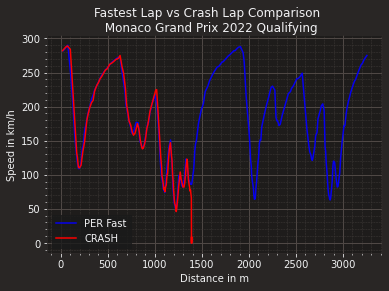

In [16]:
rbr_color = fastf1.plotting.team_color('RBR')


fig, ax = plt.subplots()
ax.plot(per_tel['Distance'], per_tel['Speed'], color=rbr_color , label='PER Fast')
ax.plot(per_tel_c['Distance'], per_tel_c['Speed'], color='red', label='CRASH')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap vs Crash Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()